 # Project Title: "Predicting Household Energy Efficiency Using Machine Learning"

# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# 2.1 Load Dataset 

In [2]:
df = pd.read_csv("energy_efficiency_data.csv")
df.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
X = df.drop(["Heating_Load", "Cooling_Load"], axis=1)
y = df["Heating_Load"]  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train, X_test, y_train, y_test

(     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
 60                   0.82         612.5      318.5     147.00             7.0   
 618                  0.64         784.0      343.0     220.50             3.5   
 346                  0.86         588.0      294.0     147.00             7.0   
 294                  0.90         563.5      318.5     122.50             7.0   
 231                  0.66         759.5      318.5     220.50             3.5   
 ..                    ...           ...        ...        ...             ...   
 71                   0.76         661.5      416.5     122.50             7.0   
 106                  0.86         588.0      294.0     147.00             7.0   
 270                  0.71         710.5      269.5     220.50             3.5   
 435                  0.98         514.5      294.0     110.25             7.0   
 102                  0.90         563.5      318.5     122.50             7.0   
 
      Orientat

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 9.153187855202752
R² Score: 0.912184095154691


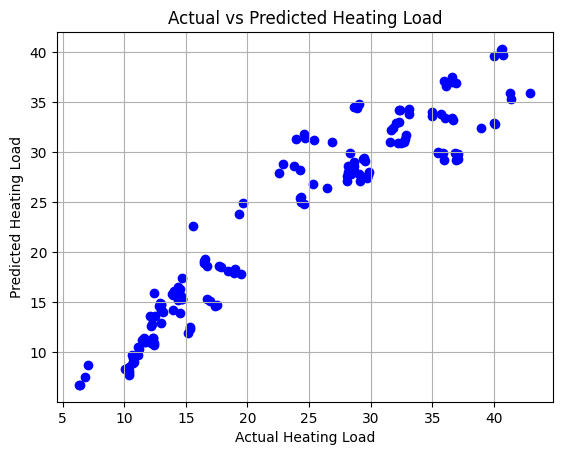

In [7]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load")
plt.grid(True)
plt.show()


In [8]:
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("RF R2:", r2_score(y_test, y_pred_rf))


RF R2: 0.9976443579647803


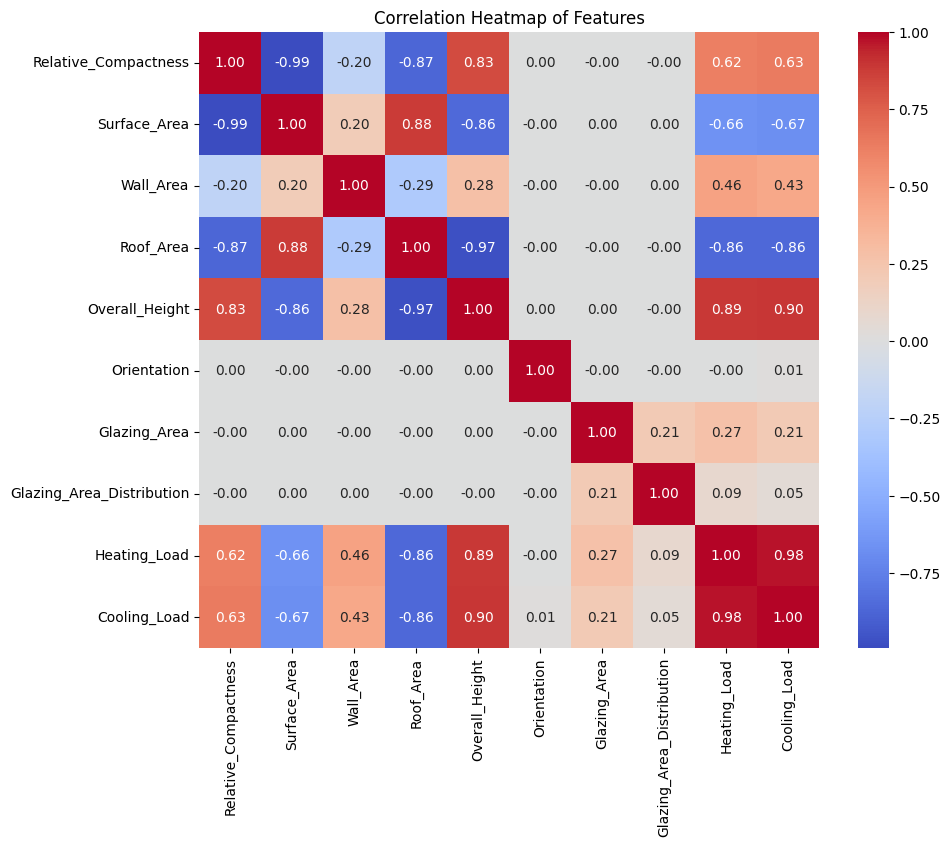

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()


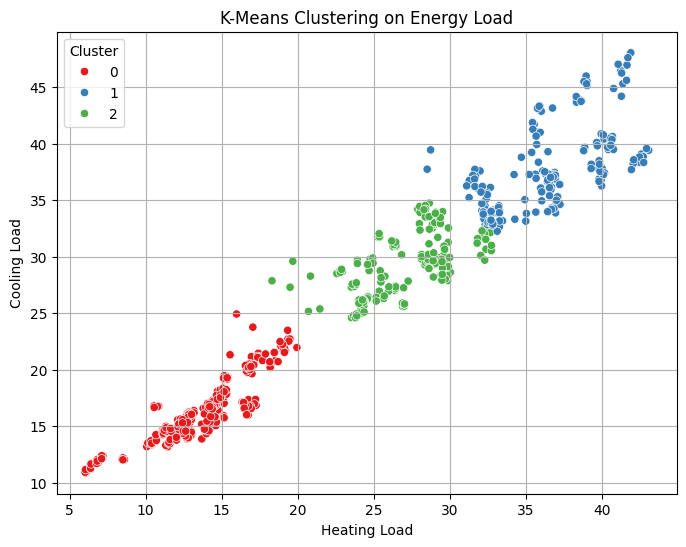

In [10]:
from sklearn.cluster import KMeans

X_cluster = df[['Heating_Load', 'Cooling_Load']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Heating_Load', y='Cooling_Load', hue='Cluster', data=df, palette='Set1')
plt.title('K-Means Clustering on Energy Load')
plt.xlabel('Heating Load')
plt.ylabel('Cooling Load')
plt.grid(True)
plt.show()
